## PROJECT

# Reading the Data

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('Documents/CleanDB3.csv', delimiter=';')
df.head()

,Project,FY,Quarter,Month,Main Category,Category_details,Main_Causes,Causes_details,Amount
0,ALNG,2010,Q3,August,Operations,Installations,PLANNING,1.2 Late delivery from suppliers/subcontractors,313.0
1,ALNG,2010,Q3,June,Operations,Installations,PLANNING,1.4 Ship Rescheduling/Reallocation : Change of...,1670.0
2,ALNG,2010,Q2,May,Operations,Installations,PLANNING,1.4 Ship Rescheduling/Reallocation : Change of...,1636.0
3,Block 15,2010,Q1,February,Project Management,Project Management,PLANNING,1.1 Late issue of AFC documentation,600.0
4,Block 15,2010,Q1,December,Fabrication,Fabrication,PLANNING,1.1 Late issue of AFC documentation,100.0


In [3]:
#Finding Non nulle values 
print(df.isnull().sum())

Project             0
FY                  0
Quarter             0
Month               0
Main Category       0
Category_details    0
Main_Causes         0
Causes_details      0
Amount              0
dtype: int64


In [4]:
#Change Amount column to Float so it can be operable
df.Amount = df.Amount.astype('float64', raise_on_error = False)
print(df.Amount.describe())

count      521.000000
mean       284.186065
std       1081.084659
min      -8935.000000
25%         20.000000
50%         50.750000
75%        261.000000
max      11768.000000
Name: Amount, dtype: float64


In [5]:
#Exploring the main causes 
print(df.Main_Causes.value_counts())

COMMERCIAL/CONTRACTUAL                       304
PERFORMANCE ERRORS OR INEFFICIENCIES         105
PLANNING                                      70
NON-COMPLIANCE OF MATERIALS AND EQUIPMENT     27
EQUIPMENT BREAKDOWN                           15
Name: Main_Causes, dtype: int64


In [6]:
#Check that FY is int and Amount is now a Float value
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 9 columns):
Project             521 non-null object
FY                  521 non-null int64
Quarter             521 non-null object
Month               521 non-null object
Main Category       521 non-null object
Category_details    521 non-null object
Main_Causes         521 non-null object
Causes_details      521 non-null object
Amount              521 non-null float64
dtypes: float64(1), int64(1), object(7)
memory usage: 36.7+ KB
None


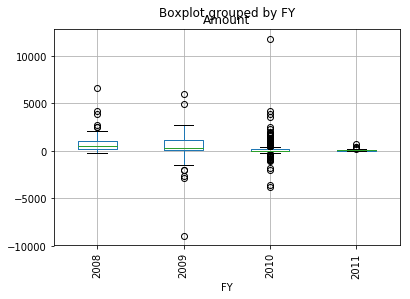

In [7]:
#Check the amount generated by all the project in the four evaluated years 
df.boxplot(column='Amount', by='FY', rot=90)
plt.show()

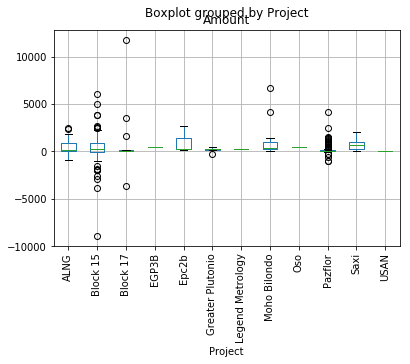

In [8]:
#Compare the projects
df.boxplot(column='Amount', by='Project', rot=90)
plt.show()

In [9]:
#Create a new dataframe to evaluate only overcosts
overcost = df[df.Amount > 0]
print(overcost.head())

    Project    FY Quarter     Month       Main Category    Category_details  \
0      ALNG  2010      Q3    August          Operations       Installations   
1      ALNG  2010      Q3      June          Operations       Installations   
2      ALNG  2010      Q2       May          Operations       Installations   
3  Block 15  2010      Q1  February  Project Management  Project Management   
4  Block 15  2010      Q1  December         Fabrication         Fabrication   

  Main_Causes                                     Causes_details  Amount  
0    PLANNING    1.2 Late delivery from suppliers/subcontractors   313.0  
1    PLANNING  1.4 Ship Rescheduling/Reallocation : Change of...  1670.0  
2    PLANNING  1.4 Ship Rescheduling/Reallocation : Change of...  1636.0  
3    PLANNING                1.1 Late issue of AFC documentation   600.0  
4    PLANNING                1.1 Late issue of AFC documentation   100.0  


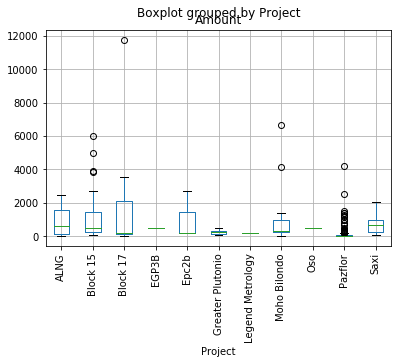

In [10]:
#Creating a new dataframe where 
overcost.boxplot(column = 'Amount', by = 'Project', rot=90)
plt.show()

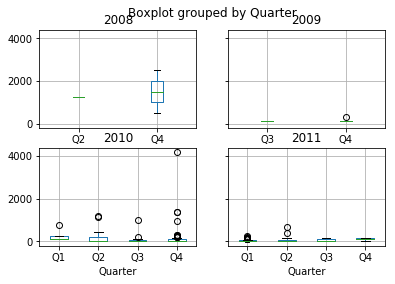

In [11]:
#Explore the Pazflor project by year/by quarter since it has several values 
ProjectPazflor = overcost.loc[df['Project'] == 'Pazflor']
ProjectPazflor.groupby('FY').boxplot(column = 'Amount', by = 'Quarter')
plt.show()

In [12]:
#Check for the amount of values for each of the months 
print(overcost.groupby('FY').Month.value_counts())

FY    Month    
2008  June         18
      November     10
      July          7
      March         5
      August        4
      December      4
      February      4
      May           4
      January       2
      October       2
      April         1
2009  August       13
      November     10
      July          7
      September     6
      February      5
      May           5
      June          3
      April         2
      January       2
      October       2
      March         1
2010  November     31
      October      24
      September    19
      August       18
      February     18
      April        13
      January      13
      May          13
      December     12
      March        11
      July          7
      June          6
2011  December     24
      January      22
      February     21
      March        21
      April        13
      May          11
      June          6
      July          5
      September     5
      August        4
      November  

In [20]:
#Since the months are objects, and are not in order, I am converting the name of the month to the number
import pandas as pd
mapping = {'January': 1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June': 6, 'July': 7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
overcost.loc['MonthN']=overcost.Month.map(mapping)
print(overcost.info())

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 0 to MonthN
Data columns (total 10 columns):
Project             438 non-null object
FY                  438 non-null float64
Quarter             438 non-null object
Month               438 non-null object
Main Category       438 non-null object
Category_details    438 non-null object
Main_Causes         438 non-null object
Causes_details      438 non-null object
Amount              438 non-null float64
MonthN              438 non-null float64
dtypes: float64(3), object(7)
memory usage: 57.7+ KB
None


In [14]:
#Now I explore the overall overcosts in each year for all the projects, the X axis is the Month #
#import seaborn as sns
#other option: overcost.groupby('FY').boxplot(column = 'Amount', by = 'MonthN')
#sns.lmplot(x='MonthN', y='Amount', data=overcost, hue ='FY', row='FY')
#plt.show()

## Group Data and Export

In [21]:
# First I explore the data to check minumum and maximum values
print(overcost.groupby(['FY','MonthN'])[['Project','Amount']].agg(['min','max']))

                        Project                         Amount              
                            min               max          min           max
FY     MonthN                                                               
2008.0 1.0                  Oso              Saxi   500.000000   1078.000000
       2.0     Greater Plutonio  Greater Plutonio   100.000000    250.000000
       3.0                Epc2b              Saxi   150.000000   2047.000000
       4.0     Greater Plutonio  Greater Plutonio   300.000000    300.000000
       5.0             Block 15              Saxi   128.000000   2000.000000
       6.0         Moho Bilondo              Saxi    69.224400   6661.110000
       7.0             Block 15      Moho Bilondo    20.000000   1128.000000
       8.0             Block 15      Moho Bilondo   200.000000   2692.000000
       10.0            Block 15              Saxi    83.000000    516.000000
       11.0            Block 15           Pazflor   400.000000   3879.000000

In [22]:
#create a new data frame with the sum of overcost for each project, year and month
data = overcost.groupby(['Project','FY','MonthN']).Amount.sum()
print(data)

Project   FY      MonthN
ALNG      2009.0  7.0         462.000000
          2010.0  1.0         690.000000
                  2.0        4050.000000
                  3.0        2674.000000
                  4.0         703.000000
                  5.0        4367.000000
                  6.0        1670.000000
                  7.0        4814.000000
                  8.0        1104.000000
                  12.0        598.000000
          2011.0  12.0        409.000000
Block 15  2008.0  5.0        3870.000000
                  7.0        1249.000000
                  8.0         691.000000
                  10.0        516.000000
                  11.0       8979.000000
          2009.0  1.0         330.000000
                  2.0        6352.000000
                  3.0        6000.000000
                  4.0        4622.000000
                  5.0       10534.000000
                  6.0        4991.000000
                  7.0        2440.000000
                  8.0        632

In [ ]:
#Export the dataframe to excel 
#data.to_excel('Documents/data.xlsx')

In [ ]:
#print(type(data))

In [ ]:
#import numpy as np
#zero_data = pd.DataFrame(np.zeros((720,1)))
#print(zero_data.head())

In [ ]:
#overcost.loc['zeros']= 0

In [23]:
overcost.head()

,Project,FY,Quarter,Month,Main Category,Category_details,Main_Causes,Causes_details,Amount,MonthN
0,ALNG,2010.0,Q3,August,Operations,Installations,PLANNING,1.2 Late delivery from suppliers/subcontractors,313.0,8.0
1,ALNG,2010.0,Q3,June,Operations,Installations,PLANNING,1.4 Ship Rescheduling/Reallocation : Change of...,1670.0,6.0
2,ALNG,2010.0,Q2,May,Operations,Installations,PLANNING,1.4 Ship Rescheduling/Reallocation : Change of...,1636.0,5.0
3,Block 15,2010.0,Q1,February,Project Management,Project Management,PLANNING,1.1 Late issue of AFC documentation,600.0,2.0
4,Block 15,2010.0,Q1,December,Fabrication,Fabrication,PLANNING,1.1 Late issue of AFC documentation,100.0,12.0


In [32]:
overcost_cut = overcost.drop(columns = ['Quarter','Month', 'Main Category', 'Category_details', 'Main_Causes'])
overcost_cut.index

Index([       0,        1,        2,        3,        4,       10,       11,
             12,       13,       14,
       ...
            511,      512,      513,      514,      515,      516,      517,
            518,      520, 'MonthN'],
      dtype='object', length=439)

In [52]:
#Broadcasting a new column with 0s
overcost_cut['zeros'] = 0
overcost_cut.head()

,Project,FY,Causes_details,Amount,MonthN,zeros
0,ALNG,2010.0,1.2 Late delivery from suppliers/subcontractors,313.0,8.0,0
1,ALNG,2010.0,1.4 Ship Rescheduling/Reallocation : Change of...,1670.0,6.0,0
2,ALNG,2010.0,1.4 Ship Rescheduling/Reallocation : Change of...,1636.0,5.0,0
3,Block 15,2010.0,1.1 Late issue of AFC documentation,600.0,2.0,0
4,Block 15,2010.0,1.1 Late issue of AFC documentation,100.0,12.0,0


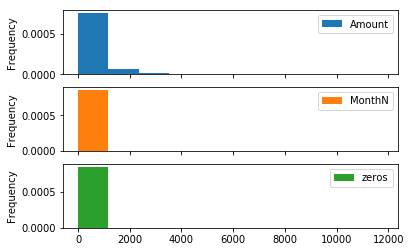

In [97]:
overcost_cut.plot(kind = 'hist', subplots = True, normed = True)
plt.show()

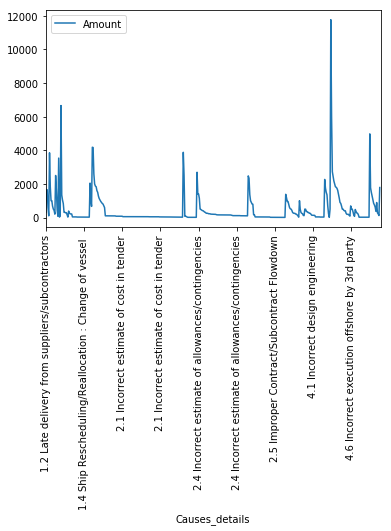

In [103]:
overcost_cut.plot(x='Causes_details', y = 'Amount', rot = 90)

In [106]:
#overcost_cut.to_excel('Documents/overcost_cut.xlsx')

In [111]:
mapping2 = {'1.2 Late delivery from suppliers/subcontractors': 1,
'1.4 Ship Rescheduling/Reallocation : Change of vessel ' : 2,
'1.1 Late issue of AFC documentation':3,
'1.3 Late availability of ships extra costs':4,
'2.1 Incorrect estimate of cost in tender':5,
'2.2 Improper White Book Rates / Escalations':6,
'2.4 Incorrect estimate of allowances/contingencies':7,
'2.5 Improper Contract/Subcontract Flowdown':8,
'3.1 Materials and equipment delivered out-of specs':9,
'3.2 Incomplete or partial delivery':10,
'4.1 Incorrect design engineering':11,
'4.2 Incorrect installation engineering':12,
'4.3 Extra costs/staff cause by final docs delay':13,
'4.5 Incorrect execution offshore by Acergy':14,
'4.6 Incorrect execution offshore by 3rd party':15,
'4.7 Incorrect onshore local logistic':16,
'5. EQUIPMENT BREAKDOWN':17,
'5.1 Lack of preventive maintenance':18,
'5.2 Misuse of equipment':19}


In [116]:
overcost_cut['CausaN']=overcost_cut.Causes_details.map(mapping2)
overcost_cut

,Project,FY,Causes_details,Amount,MonthN,zeros,CausaN
0,ALNG,2010,1.2 Late delivery from suppliers/subcontractors,313.000000,8.0,0.0,1.0
1,ALNG,2010,1.4 Ship Rescheduling/Reallocation : Change of...,1670.000000,6.0,0.0,2.0
2,ALNG,2010,1.4 Ship Rescheduling/Reallocation : Change of...,1636.000000,5.0,0.0,2.0
3,Block 15,2010,1.1 Late issue of AFC documentation,600.000000,2.0,0.0,3.0
4,Block 15,2010,1.1 Late issue of AFC documentation,100.000000,12.0,0.0,3.0
10,Block 15,2010,1.2 Late delivery from suppliers/subcontractors,3850.000000,1.0,0.0,1.0
11,Block 15,2010,1.2 Late delivery from suppliers/subcontractors,1835.000000,1.0,0.0,1.0
12,Block 15,2008,1.2 Late delivery from suppliers/subcontractors,1000.000000,11.0,0.0,1.0
13,Block 15,2010,1.2 Late delivery from suppliers/subcontractors,1000.000000,12.0,0.0,1.0
14,Block 15,2009,1.2 Late delivery from suppliers/subcontractors,671.400000,2.0,0.0,1.0
